# Probability Review
Let's start by reviewing some basic probability concepts. We'll focus specifically on continuous random variables, which is what the Copulas library is primarily intended to support.

In [1]:
%matplotlib inline
import warnings
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
N = 10000
warnings.filterwarnings("ignore")

## Probability Density Function
A probability density function $f(x)$ captures the likelihood that a random sample from the distribution is equal to $x$. For example, the probability density function for the standard normal distribution is given by

\begin{equation}
f(x) = \frac{1}{2 \pi} e^{-x^2/2}
\end{equation}

Note that the probability density function does **not** return a probability but rather a "relative likelihood" which can take on values in the interval $[0, \infty)$; however, the integral over the probability density function from $-\infty$ to $\infty$ must be equal to one.

## Cumulative Distribution Function
In many cases, the probability density function can be hard to work with directly. Instead, we will use the cumulative distribution function $F(x)$ which is defined as the integral of the probability density function

\begin{equation}
F(x) = \int_{-\infty}^x f(x)
\end{equation}

The below figure shows the probability density function $f(x)$ and the cumulative distribution function $F(x)$ for a normal distribution with mean $0.0$ and variance $0.25$.

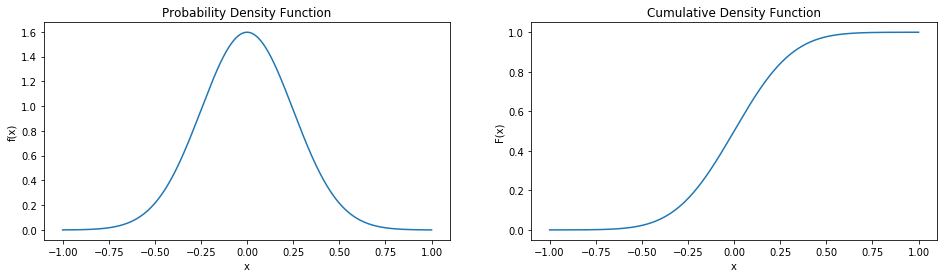

In [2]:
x = np.linspace(-1.0, 1.0, N)

figure = plt.figure(figsize=(16,4))
figure.add_subplot(1, 2, 1)
plt.plot(x, stats.norm.pdf(x, loc=0.0, scale=0.25))
plt.title("Probability Density Function")
plt.xlabel("x")
plt.ylabel("f(x)")

figure.add_subplot(1, 2, 2)
plt.plot(x, stats.norm.cdf(x, loc=0.0, scale=0.25))
plt.title("Cumulative Density Function")
plt.xlabel("x")
plt.ylabel("F(x)")

plt.show();

## Probability Integral Transform
The probability integral transform is a key component in our toolkit for working with probability distributions. Suppose we have a random variable $X$ that comes from a distribution with cumulative density function $F(X)$. Then, we can define a random variable $Y$ as

\begin{equation}
Y = F(X)
\end{equation}

and prove that $Y$ follows a uniform distribution over the interval $[0.0, 1.0]$. The below figure shows an example of this. We sample some data from a normal distribution and plot it on the left. Then, we use the CDF of the normal distribution to transform the data, plot it on the right, and observe that it resembles an uniform distribution.

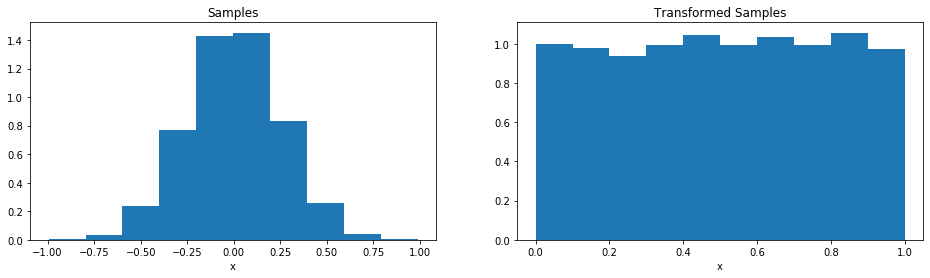

In [3]:
X = stats.norm.rvs(size=N, loc=0.0, scale=0.25)
X_pit = stats.norm.cdf(X, loc=0.0, scale=0.25)

figure = plt.figure(figsize=(16,4))
figure.add_subplot(1, 2, 1)
plt.hist(X, density=True, bins=10)
plt.title("Samples")
plt.xlabel("x")

figure.add_subplot(1, 2, 2)
plt.hist(X_pit, density=True, bins=10)
plt.title("Transformed Samples")
plt.xlabel("x")

plt.show();

## Univariate Distributions
The **Copulas** library implements a variety of univariate distributions. Every univariate distribution provides a `fit` and `sample` method which allows users to estimate the parameters of the distribution from the data and then sample new data from the distribution. The below code generates some random data and shows how to fit and sample using four different univariate distributions provided by the library.

In [4]:
mask = np.random.randint(0, 2, size=N)
data = np.random.exponential(size=N)*mask + np.random.normal(loc=10.0, scale=1.0, size=N)*(1-mask)

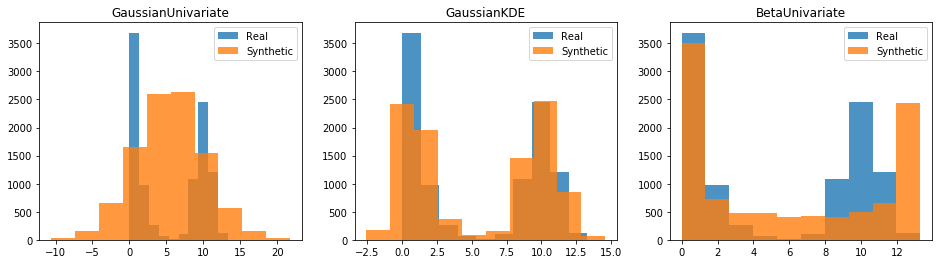

In [5]:
from copulas.univariate import *

def fit_and_sample(model):
    model.fit(data)
    return model.sample(N).flatten()

figure = plt.figure(figsize=(16,4))
models = [GaussianUnivariate(), GaussianKDE(), BetaUnivariate()]
for idx, model in enumerate(models):
    figure.add_subplot(1, len(models), idx+1)
    plt.hist(data, alpha=0.8, bins=10, label="Real")
    plt.hist(fit_and_sample(model), alpha=0.8, bins=10, label="Synthetic")
    plt.title(type(model).__name__)
    plt.legend()
plt.show();

As the above histograms show, different univariate distributions are more suitable for different types of data. We provide a `select_univariate` method which uses the Kolmogorov–Smirnov test statistic to select the best fitting model. The below figure shows a few different data distributions and the univariate distribution that is selected for each.

Here are a few more examples of data distributions and the type of univariate distribution that will be automatically selected.

In [6]:
datasets = []

mask = np.random.randint(0, 5, size=N) == 0
data = np.random.exponential(size=N)*mask + np.random.normal(loc=5.0, scale=1.0, size=N)*(1-mask)
datasets.append(data)

data = np.random.exponential(size=N)
datasets.append(data)

data = np.random.uniform(size=N)
datasets.append(data)

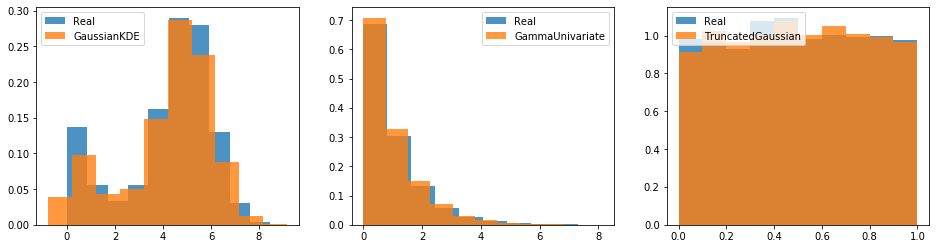

In [7]:
figure = plt.figure(figsize=(16,4))
for idx, data in enumerate(datasets):
    model = select_univariate(data)
    figure.add_subplot(1, len(datasets), idx+1)
    plt.hist(data, alpha=0.8, density=True, label="Real")
    plt.hist(model.sample(N).flatten(), alpha=0.8, density=True, label=type(model).__name__)
    plt.legend()
plt.show();